<a href="https://colab.research.google.com/github/Alzaro207/Aprendizaje-supervisado/blob/main/221B0184_Aprendizaje_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Modulos Necesarios

In [ ]:
# Manejo de vectores y tablas:
import numpy as np
import pandas as pd

# Manejo de cadenas de caracteres y regex:
import string as s
import re

# Natural Languaje Toolkit:
import nltk
from nltk.corpus import stopwords

# Herramientas de visualizacion:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Nube de palabras:
from wordcloud import WordCloud

# Modelos de aprendizaje supervisado:
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics  import f1_score, accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import sys
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.13.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.1
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.5
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cy

# Cargar Datos

Tenemos dos archivos con noticias clasificadas en 4 categorias:

1: Noticias del Mundo

2: Deportes

3: Negocios

4: Ciencia y Tecnologia

Los archivos train.cvs y test.csv contienen el texto de la noticia y la etiqueta de la categoria a la que perternecen. Vamos a cargar sus datos en dos dataframes de pandas, entrenamiento y prueba:

In [ ]:
entrenamiento = pd.read_csv("/content/train.csv",
                           header=0,
                           names=['categoria','titular','texto'])

prueba = pd.read_csv("/content/test.csv",
                     header=0,
                     names=['categoria','titular','texto'])

In [ ]:
entrenamiento

,categoria,titular,texto
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [ ]:
# Una noticia de ejemplo:
entrenamiento['texto'][200]

'Computer games can promote problem-solving and team-building in children, say games industry experts.'

In [ ]:
prueba

,categoria,titular,texto
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


In [ ]:
train_x = entrenamiento.texto
test_x = prueba.texto

train_y = entrenamiento.categoria
test_y = prueba.categoria

In [ ]:
train_x

0         Reuters - Short-sellers, Wall Street's dwindli...
1         Reuters - Private investment firm Carlyle Grou...
2         Reuters - Soaring crude prices plus worries\ab...
3         Reuters - Authorities have halted oil export\f...
4         AFP - Tearaway world oil prices, toppling reco...
                                ...                        
119995     KARACHI (Reuters) - Pakistani President Perve...
119996    Red Sox general manager Theo Epstein acknowled...
119997    The Miami Dolphins will put their courtship of...
119998    PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999    INDIANAPOLIS -- All-Star Vince Carter was trad...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_y

0         3
1         3
2         3
3         3
4         3
         ..
119995    1
119996    2
119997    2
119998    2
119999    2
Name: categoria, Length: 120000, dtype: int64

# Visualizacion de Datos

Podemos visualizar cuantas noticias hay por categoria. Si hubiese muchas menos noticias de una categoria en concreto tendriamos un grupo de datos desequilibrado. En este caso parece que las etiquetas de las noticias estan equilibradas:

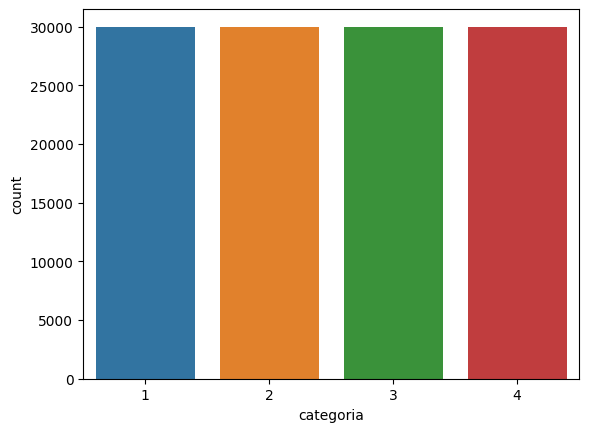

In [ ]:
df = entrenamiento
sns.countplot(x=df.categoria);

Podemos construir una nube de palabras para la categoria "mundo" y observar que palabras tienen mayor presencia:

In [ ]:
mundo = df.texto[ df.categoria[df.categoria==1].index]

In [ ]:
mundo

492       Reuters - Venezuelans turned out early\and in ...
493       Reuters - South Korean police used water canno...
494       Reuters - Thousands of Palestinian\prisoners i...
495       AFP - Sporadic gunfire and shelling took place...
496       AP - Dozens of Rwandan soldiers flew into Suda...
                                ...                        
119990    AP - U.S. Sen.-elect Barack Obama, whose 1995 ...
119992     BAGHDAD (Reuters) - As if the daily struggle ...
119993     ABUJA (Reuters) - The African Union said on S...
119994     BEIRUT (Reuters) - Syria, under intense press...
119995     KARACHI (Reuters) - Pakistani President Perve...
Name: texto, Length: 30000, dtype: object

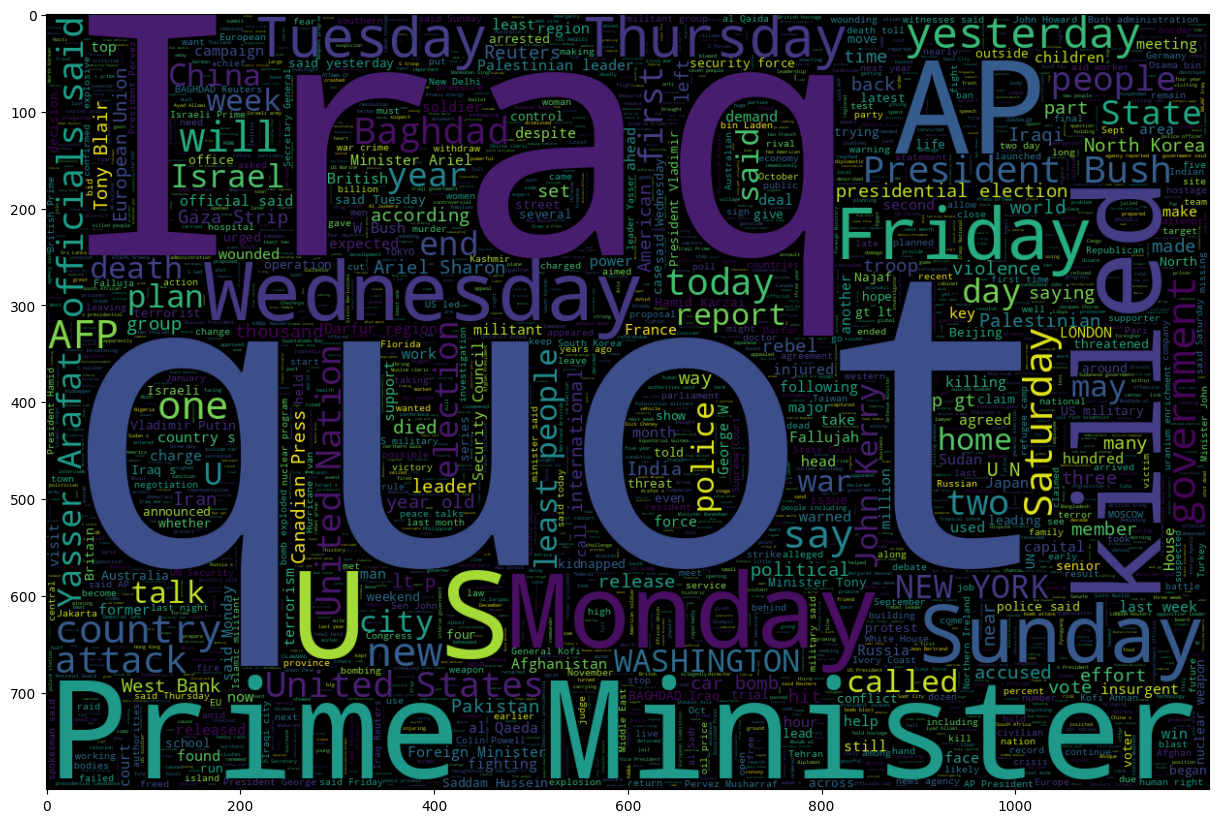

In [ ]:
plt.figure(figsize = (15,20));
nube = WordCloud(min_font_size=3,
                 max_words=2500,
                 width=1200,
                 height=800).generate(" ".join(mundo))

plt.imshow(nube, interpolation='bilinear');

¿Podrias construir las nubes para el resto de categorias? Que las nuevas nubes tengan como maximo 500, 600 y 1000 palabras cada una.

#Tokenizacion

Para que nuestro modelo pueda aprender, debemos limpiar los datos, el primer paso es separar los textos en palabras individuales (tokens, tokenizar).

In [ ]:
def tokenizar(texto):
    tokens = texto.split()
    return tokens

train_x = train_x.apply(tokenizar)
test_x = test_x.apply(tokenizar)

In [ ]:
train_x[0]

['Reuters',
 '-',
 'Short-sellers,',
 'Wall',
 "Street's",
 'dwindling\\band',
 'of',
 'ultra-cynics,',
 'are',
 'seeing',
 'green',
 'again.']

In [ ]:
train_x[200]

['Computer',
 'games',
 'can',
 'promote',
 'problem-solving',
 'and',
 'team-building',
 'in',
 'children,',
 'say',
 'games',
 'industry',
 'experts.']

# Conversion a minisculas:

El computador confundiria A con a, las palabras en mayusculas al inicio de una frase mantienen el mismos significado (semantica) aunque se representen de manera diferente. Convertimos todas las palabras a caracteres en minuscula.

In [ ]:
def hacer_minusculas(tokens):
    nuevos_tokens=[]
    for t in tokens:
        t = t.lower()
        nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(hacer_minusculas)
test_x = test_x.apply(hacer_minusculas)

In [ ]:
train_x

0         [reuters, -, short-sellers,, wall, street's, d...
1         [reuters, -, private, investment, firm, carlyl...
2         [reuters, -, soaring, crude, prices, plus, wor...
3         [reuters, -, authorities, have, halted, oil, e...
4         [afp, -, tearaway, world, oil, prices,, toppli...
                                ...                        
119995    [karachi, (reuters), -, pakistani, president, ...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [the, miami, dolphins, will, put, their, court...
119998    [pittsburgh, at, ny, giants, time:, 1:30, p.m....
119999    [indianapolis, --, all-star, vince, carter, wa...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problem-solving',
 'and',
 'team-building',
 'in',
 'children,',
 'say',
 'games',
 'industry',
 'experts.']

# Eliminar Puntuacion

Los simbolos de puntuacion tambien puede hacer que sea mas dificil la compresion del texto para la maquina. Podemos eliminar de cada token los simbolos especiales. Algunos de estos simbolos pueden tener significado, se podria limpiar el texto de cada token de una manera mas elaborada para intentar preservar este significado.

In [ ]:
def eliminar_simbolos(tokens):
    nuevos_tokens = []
    for t in tokens:
        for simbolo in s.punctuation:
            t = t.replace(simbolo, '')
        nuevos_tokens.append(t)
    return nuevos_tokens


train_x = train_x.apply(eliminar_simbolos)
test_x = test_x.apply(eliminar_simbolos)

Los simbolos de puntuacion estan recogidos en string.punctuation:

In [ ]:
s.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
train_x[0]

['reuters',
 '',
 'shortsellers',
 'wall',
 'streets',
 'dwindlingband',
 'of',
 'ultracynics',
 'are',
 'seeing',
 'green',
 'again']

In [ ]:
train_x[200]

['computer',
 'games',
 'can',
 'promote',
 'problemsolving',
 'and',
 'teambuilding',
 'in',
 'children',
 'say',
 'games',
 'industry',
 'experts']

¿De que otras maneras podriamos realizar la limpieza de los simbolos de puntuacion?

In [ ]:
# Tu codigo aqui:

# Eliminar Numeros

La presencia de numeros puede distorsionar el significado. Como tratamiento sencillo se pueden, simplemente, eliminar:

In [ ]:
def eliminar_numeros(tokens):
    sin_numeros = []
    nuevos_tokens = []

    for t in tokens:
        for digito in s.digits:
            t = t.replace(digito, '')
        sin_numeros.append(t)

    for t in sin_numeros:
        if t != '':
            nuevos_tokens.append(t)
    return nuevos_tokens

train_x=train_x.apply(eliminar_numeros)
test_x=test_x.apply(eliminar_numeros)

In [ ]:
s.digits

'0123456789'

In [ ]:
train_x

0         [reuters, shortsellers, wall, streets, dwindli...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, prices, plus, worrie...
3         [reuters, authorities, have, halted, oil, expo...
4         [afp, tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [the, miami, dolphins, will, put, their, court...
119998    [pittsburgh, at, ny, giants, time, pm, line, s...
119999    [indianapolis, allstar, vince, carter, was, tr...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[300]

['by',
 'emma',
 'ross',
 'london',
 'ap',
 'britain',
 'granted',
 'its',
 'first',
 'license',
 'for',
 'human',
 'cloning',
 'wednesday',
 'more',
 'than',
 'three',
 'years',
 'after',
 'becoming',
 'the',
 'first',
 'nation',
 'to',
 'authorize',
 'the',
 'technique',
 'to',
 'produce',
 'stem',
 'cells',
 'for',
 'medical',
 'research',
 'a',
 'team',
 'of',
 'researchers',
 'at',
 'newcastle',
 'university',
 'hope',
 'eventually',
 'to',
 'create',
 'insulinproducing',
 'cells',
 'that',
 'could',
 'be',
 'transplanted',
 'into',
 'diabetic',
 'patients']

# Eliminar Palabras Invariables (Stopwords)

Eliminamos aquellas palabras que carecen de significado propio:

In [ ]:
nltk.download('stopwords')

def quitar_paradas(tokens):
    invariables = stopwords.words('english')
    nuevos_tokens = []
    for t in tokens:
        if t not in invariables:
            nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(quitar_paradas)
test_x = test_x.apply(quitar_paradas)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
train_x

0         [reuters, shortsellers, wall, streets, dwindli...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, prices, plus, worrie...
3         [reuters, authorities, halted, oil, exportflow...
4         [afp, tearaway, world, oil, prices, toppling, ...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [miami, dolphins, put, courtship, lsu, coach, ...
119998    [pittsburgh, ny, giants, time, pm, line, steel...
119999    [indianapolis, allstar, vince, carter, traded,...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'games',
 'promote',
 'problemsolving',
 'teambuilding',
 'children',
 'say',
 'games',
 'industry',
 'experts']

# Extraer las Raices

Como las palabras variantes, con significado, pueden tener variantes con el mismo, o similar, significado, podemos extraer las raices de la palabra:

In [ ]:
nltk.download('wordnet')
lematizador = nltk.stem.WordNetLemmatizer()

def lematizar(tokens):
    nuevos_tokens = []
    for t in tokens:
        t = lematizador.lemmatize(t)
        nuevos_tokens.append(t)
    return nuevos_tokens

train_x = train_x.apply(lematizar)
test_x = test_x.apply(lematizar)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_x

0         [reuters, shortsellers, wall, street, dwindlin...
1         [reuters, private, investment, firm, carlyle, ...
2         [reuters, soaring, crude, price, plus, worries...
3         [reuters, authority, halted, oil, exportflows,...
4         [afp, tearaway, world, oil, price, toppling, r...
                                ...                        
119995    [karachi, reuters, pakistani, president, perve...
119996    [red, sox, general, manager, theo, epstein, ac...
119997    [miami, dolphin, put, courtship, lsu, coach, n...
119998    [pittsburgh, ny, giant, time, pm, line, steele...
119999    [indianapolis, allstar, vince, carter, traded,...
Name: texto, Length: 120000, dtype: object

In [ ]:
train_x[200]

['computer',
 'game',
 'promote',
 'problemsolving',
 'teambuilding',
 'child',
 'say',
 'game',
 'industry',
 'expert']

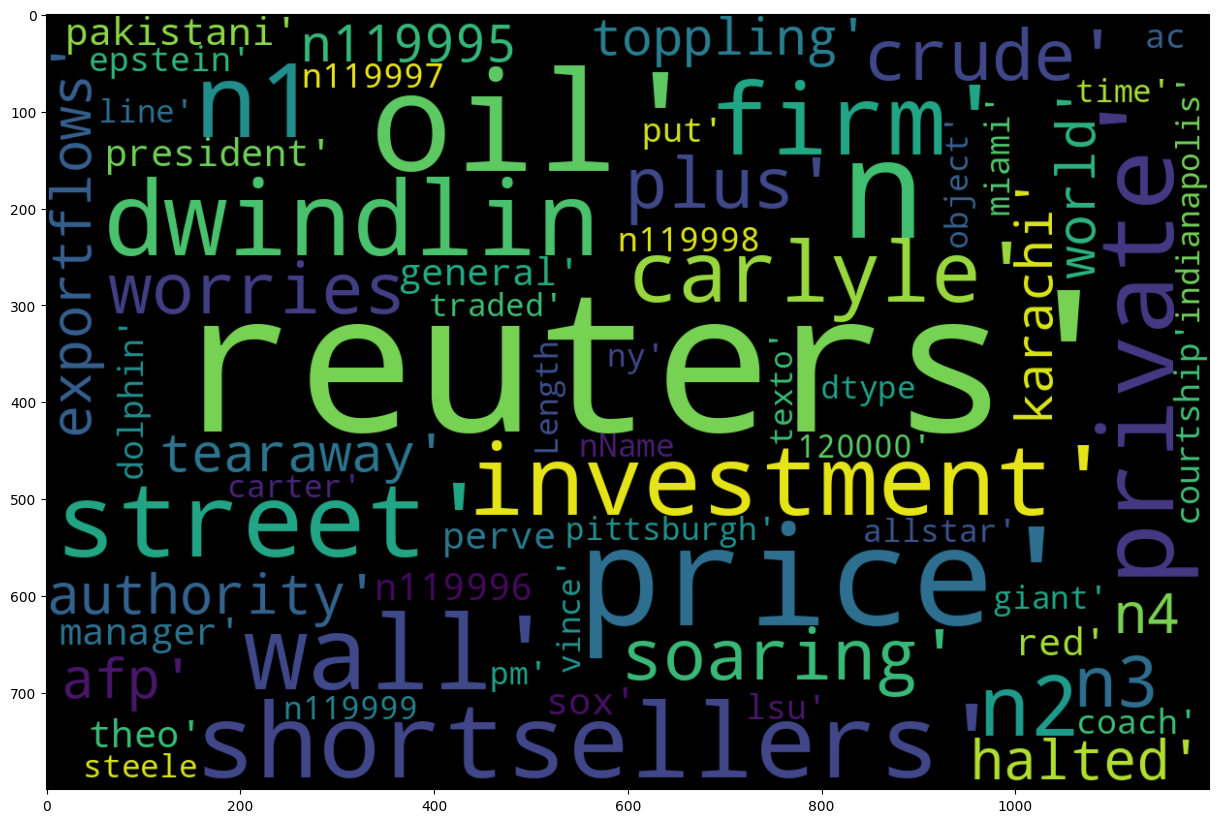

In [ ]:
plt.figure(figsize=(15, 20));
textos_limpios = str(str(train_x).split(','))
nube = WordCloud(min_font_size=3,
                 max_words=2500,
                 width=1200,
                 height=800).generate(textos_limpios)
plt.imshow(nube, interpolation='bilinear');

In [ ]:
textos_limpios

"['0         [reuters', ' shortsellers', ' wall', ' street', ' dwindlin...\\n1         [reuters', ' private', ' investment', ' firm', ' carlyle', ' ...\\n2         [reuters', ' soaring', ' crude', ' price', ' plus', ' worries...\\n3         [reuters', ' authority', ' halted', ' oil', ' exportflows', '...\\n4         [afp', ' tearaway', ' world', ' oil', ' price', ' toppling', ' r...\\n                                ...                        \\n119995    [karachi', ' reuters', ' pakistani', ' president', ' perve...\\n119996    [red', ' sox', ' general', ' manager', ' theo', ' epstein', ' ac...\\n119997    [miami', ' dolphin', ' put', ' courtship', ' lsu', ' coach', ' n...\\n119998    [pittsburgh', ' ny', ' giant', ' time', ' pm', ' line', ' steele...\\n119999    [indianapolis', ' allstar', ' vince', ' carter', ' traded', '...\\nName: texto', ' Length: 120000', ' dtype: object']"

La nube de arriba contiene ciertos elementos que no son palabras y algunos caracteres extra. ¿Podrias limpiar train_x y test_x y mostrar su nube de palabras sin estos caracteres?

In [ ]:
# Tu codigo:

In [ ]:
del textos_limpios

# Extraccion de Caracteristicas

Es muy complicado hacer que la maquina entienda las palabras a traves de la lectura de sus fonemas o representacion en caracteres. Para ello tenemos que vectorizar (embeber) las palabras completas dentro de su contexto. En este caso utilizaremos una tecnica sencilla de frecuencia de palabras en cada documento:

In [ ]:
train_x = train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x = test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [ ]:
train_x[200]

'computer game promote problemsolving teambuilding child say game industry expert '

In [ ]:
test_x[0]

'union representing worker turner newall say disappointed talk stricken parent firm federal mogul '

In [ ]:
# Para reducir carga de RAM, se puede reducir el numero
# de caracteristicas maximas. N=5000 o 10000
vectorizador = TfidfVectorizer(max_features=8000, min_df=6)

train_1 = vectorizador.fit_transform(train_x)
test_1 = vectorizador.transform(test_x)
vectorizador.predict

print("Numero de caracteristicas extraidas.")
print(len(vectorizador.get_feature_names_out()))
print(vectorizador.get_feature_names_out()[:20])

train_arr = train_1.toarray()
test_arr = test_1.toarray()

Numero de caracteristicas extraidas.
8000
['aa' 'aapl' 'aaron' 'ab' 'abandon' 'abandoned' 'abandoning' 'abarrel'
 'abbas' 'abbey' 'abc' 'abducted' 'abduction' 'abdul' 'abdullah' 'abidjan'
 'ability' 'able' 'aboard' 'abortion']


In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(train_arr[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
print(len(train_arr[200]))

8000


In [ ]:
np.count_nonzero(train_arr[200])

7

In [ ]:
for i in range(10):
  print(train_x[i])
  print("Indice del maximo: ", np.argmax(train_arr[i]))
  max_pos = np.argmax(train_arr[i])
  print("Valor del maximo: ", train_arr[i][max_pos])
  print("Palabras: ", np.count_nonzero(train_arr[i]))
  print("\n")

reuters shortsellers wall street dwindlingband ultracynics seeing green 
Indice del maximo:  6306
Valor del maximo:  0.6012488505988055
Palabras:  5


reuters private investment firm carlyle groupwhich reputation making welltimed occasionallycontroversial play defense industry quietly placedits bet another part market 
Indice del maximo:  733
Valor del maximo:  0.3621322050075687
Palabras:  14


reuters soaring crude price plus worriesabout economy outlook earnings expected tohang stock market next week depth thesummer doldrums 
Indice del maximo:  1897
Valor del maximo:  0.4159497677739426
Palabras:  14


reuters authority halted oil exportflows main pipeline southern iraq afterintelligence showed rebel militia could strikeinfrastructure oil official said saturday 
Indice del maximo:  4866
Valor del maximo:  0.3854723535880699
Palabras:  15


afp tearaway world oil price toppling record straining wallet present new economic menace barely three month u presidential election 
Indice del

# Ejemplo Classificador: Arbol de Decision

Con las noticias vectorizadas podemos proceder a entrenar un modelo. En este caso un modelo de clasificador en arbol, que veremos en:

https://scikit-learn.org/stable/modules/tree.html#:~:text=Decision%20Trees%20(DTs)%20are%20a,as%20a%20piecewise%20constant%20approximation.

In [ ]:
arbol = DecisionTreeClassifier()

# Limitar los ejemplos por si tarda demasiado tiempo:
LIMITAR = True
if LIMITAR:
  N = 60000
  train_arr_cortado = train_arr[0:N]
  train_y_cortado = train_y[0:N]
else:
    train_arr_cortado = train_arr
    train_y_cortado = train_y

arbol.fit(train_arr_cortado, train_y_cortado)

DecisionTreeClassifier()

In [ ]:
arbol.predict([test_arr[7000]])

array([4])

In [ ]:
test_y[7000]

4

In [ ]:
test_x[7000]

Pulse enter para continuar.


''

In [ ]:
pred = arbol.predict(test_arr)

print("Primeras 20 categorias reales:")
print(test_y.tolist()[:20])
print("Primeras 20 predicciones:")
print(pred.tolist()[:20])

Primeras 20 categorias reales:
[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Primeras 20 predicciones:
[3, 4, 4, 2, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3]


In [ ]:
test_x[5]

'british department education skill dfes recently launched music manifesto campaign ostensible intention educating next generation british musician unfortunately also teamed music industry emi various artist make popular emi apparently negotiated end well child school indoctrinated illegality downloading musicthe ignorance audacity got little wrote open letter dfes unfortunately pedantic suppose writing goverment representative hope find useful perhaps feel inspired something similar thing happened area '

Podemos evaluar el modelo respecto a varias metricas estadisticas:

In [ ]:
def evaluar_modelo(y, y_pred):
    # Atencion, la puntuacion F1 no es muy determinante en clasificadores
    # multivariable.

    print("Puntuacion F1:")
    print(f1_score(y, y_pred, average='micro'))
    print("Precision:")
    print(accuracy_score(y, y_pred))
    print("Precision %:")
    print(round(accuracy_score(y, y_pred)*100, 3), "%")

In [ ]:
evaluar_modelo(test_y, pred)

Puntuacion F1:
0.776578947368421
Precision:
0.776578947368421
Precision %:
77.658 %


In [ ]:
etiquetas = ['Mundo', 'Deportes', 'Negocios', 'Ciencia']

def matriz_confusion(test_y, pred, color):
    cof = confusion_matrix(test_y, pred)
    cof = pd.DataFrame(cof, index=[i for i in range(1, 5)],
                       columns=[i for i in range(1, 5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8, 8));

    sns.heatmap(cof, cmap=color, linewidths=1, annot=True,
                square=True, fmt='d', cbar=False,
                xticklabels=etiquetas, yticklabels=etiquetas);

    plt.xlabel("Predicciones");
    plt.ylabel("Realidad");

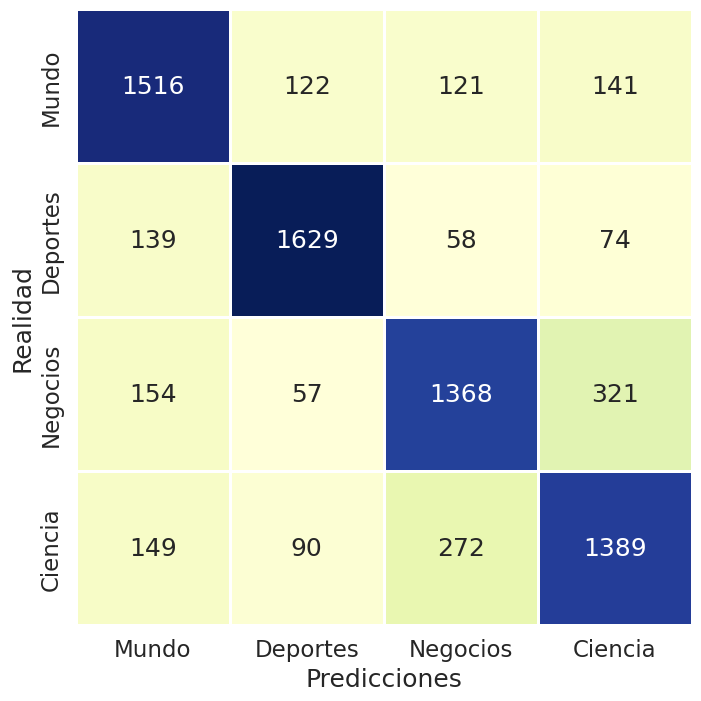

In [ ]:
matriz_confusion(test_y, pred, 'YlGnBu')

In [ ]:
noticia_nueva = "Tesla shareholder calls on board to suspend Elon Musk for agreeing with antisemitic post"
noticia_vector = vectorizador.transform([noticia_nueva])
noticia_nueva_arr = noticia_vector.toarray()

In [ ]:
arbol.predict(noticia_nueva_arr)

array([3])

Dados los siguientes modelos, ¿podrias entrenarlos y obtener predicciones?
¿Puedes crear una comparacion de las precisiones de cada uno de los modelos?

Modelos a entrenar y evaluar:

Clasificador Bayesiano: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Clasificador Gausiano: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Descenso de Gradiente Estocastico: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Potenciador de Gradiente Ligero: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html
